<a href="https://colab.research.google.com/github/ranjan1975/IIT-Delhi-AI-ML-Course/blob/main/Sharma_Ranjan_Module4Prpoject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pwd

'/content'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
pwd


'/content'

In [8]:
DATASET_PATH = '/content/drive/MyDrive/AI ML IIT Course/Module 4 Project'

In [9]:
pwd

'/content'

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Sequential
from keras.models import Sequential

from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [11]:
IMG_SIZE = (84, 84)
BATCH_SIZE = 32
EPOCHS = 20
NUM_CLASSES = 33
DATASET_PATH = '/content/drive/MyDrive/AI ML IIT Course/Module 4 Project/Module 4 Project Dataset'



In [12]:
# Create a function create_dataloader which will load images in batches
#flow_from_directory is a method inside ImageDataGenerator class

def create_dataloader(path, shuffle=True):
    datagen = ImageDataGenerator(rescale=1./255)
    return datagen.flow_from_directory(
        path,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical', # Since class mode is 'categorical', Labels
                                  # will be one hot encocded
        shuffle=shuffle
    )



In [14]:
train_loader = create_dataloader(DATASET_PATH + "/train")
val_loader   = create_dataloader(DATASET_PATH + "/val", shuffle=False)
test_loader  = create_dataloader(DATASET_PATH + "/test", shuffle=False)

Found 13203 images belonging to 33 classes.
Found 3301 images belonging to 33 classes.
Found 3300 images belonging to 33 classes.


In [15]:
idx_to_class = {v:k for k,v in train_loader.class_indices.items()}
#v:k for k,v reverses the dictionary

print(idx_to_class)

{0: 'african_hunting_dog', 1: 'ant', 2: 'ashcan', 3: 'black_footed_ferret', 4: 'bookshop', 5: 'carousel', 6: 'catamaran', 7: 'cocktail_shaker', 8: 'combination_lock', 9: 'consomme', 10: 'coral_reef', 11: 'dalmatian', 12: 'dishrag', 13: 'fire_screen', 14: 'goose', 15: 'green_mamba', 16: 'king_crab', 17: 'ladybug', 18: 'lion', 19: 'lipstick', 20: 'miniature_poodle', 21: 'orange', 22: 'organ', 23: 'parallel_bars', 24: 'photocopier', 25: 'rhinoceros_beetle', 26: 'slot', 27: 'snorkel', 28: 'spider_web', 29: 'toucan', 30: 'triceratops', 31: 'unicycle', 32: 'vase'}


In [16]:
def build_model():

    model = Sequential([
        Input(shape=(84, 84, 3)),

        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D((2,2)),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D((2,2)),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


model = build_model()
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 82, 82, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 41, 41, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 39, 39, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 17, 17, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 33)             │         8,481 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,199,137 (8.39 MB)

 Trainable params: 2,199,137 (8.39 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(
    train_loader,
    validation_data=val_loader,
    epochs=EPOCHS,
    validation_steps=50
)
# Keras returns a history object. Its an object. If you do print(type(history))
# You'll get 'leras.callbacks.History'
# history.history is a dictionary which looks like {'loss': [...],
# 'accuracy': [...], 'val_accuracy': [...]}

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 7893s 19s/step - accuracy: 0.0928 - loss: 3.2987 - val_accuracy: 0.2206 - val_loss: 2.7518
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 242s 585ms/step - accuracy: 0.2305 - loss: 2.7620 - val_accuracy: 0.3119 - val_loss: 2.3728
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 230s 557ms/step - accuracy: 0.3284 - loss: 2.3739 - val_accuracy: 0.3544 - val_loss: 2.2596
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 262s 633ms/step - accuracy: 0.3938 - loss: 2.1123 - val_accuracy: 0.4425 - val_loss: 1.9728
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 262s 633ms/step - accuracy: 0.4588 - loss: 1.8675 - val_accuracy: 0.3919 - val_loss: 2.0747
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 262s 634ms/step - accuracy: 0.5025 - loss: 1.6785 - val_accuracy: 0.4531 - val_loss: 1.9460
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 262s 632ms/step - accuracy: 0.5513 - loss: 1.5090 - val_accuracy: 0.4606 - val_loss: 1.9187
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 228s 551ms/step - accuracy: 0.6093 - 

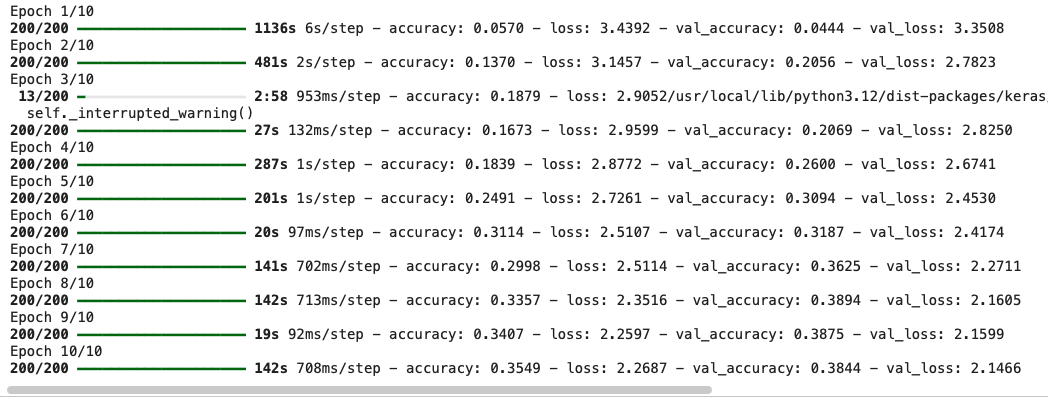

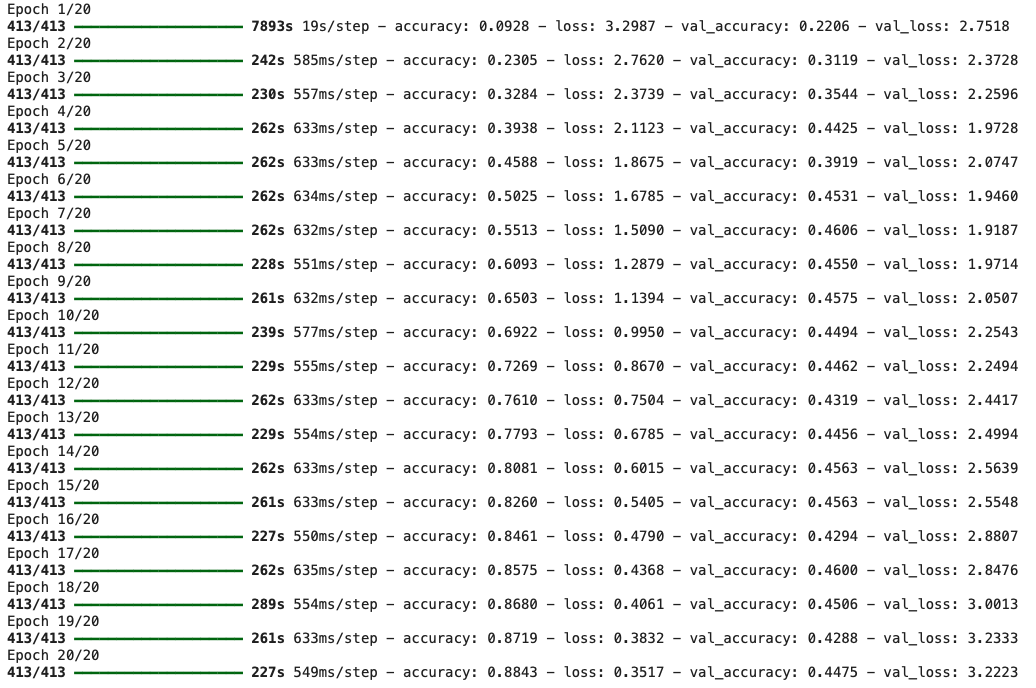

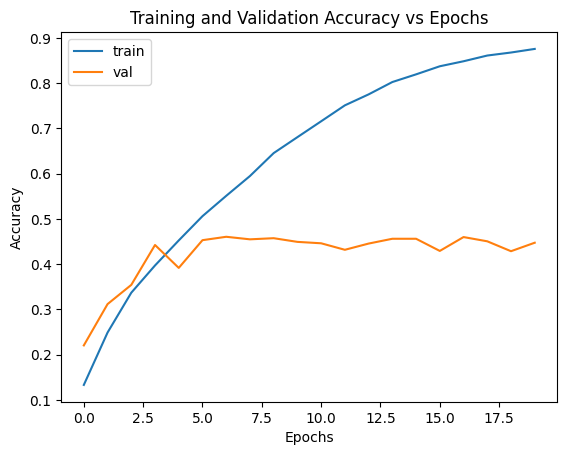

In [20]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy vs Epochs")

plt.legend()
plt.show()


In [19]:
test_loss, test_acc = model.evaluate(test_loader)
print("Test Accuracy:", test_acc)


104/104 ━━━━━━━━━━━━━━━━━━━━ 1731s 17s/step - accuracy: 0.3998 - loss: 3.3704
Test Accuracy: 0.4290909171104431


To avoid overfitting, tweaked a few settings. 256 Dense layers were too heavy it seems, so reduced it to 128 which might reduce memorization. Lowered learning rate from 0.001 to 0.0003. Also added another Dropout(0.4)

In [21]:
def build_model():

    model = Sequential([
        Input(shape=(84, 84, 3)),

        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D((2,2)),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D((2,2)),

        Flatten(),
        Dropout(0.4),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.0003),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


model = build_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 82, 82, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 41, 41, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 39, 39, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 17, 17, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 33)             │         4,257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,146,209 (4.37 MB)

 Trainable params: 1,146,209 (4.37 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(
    train_loader,
    validation_data=val_loader,
    epochs=EPOCHS,
    validation_steps=50
)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 251s 603ms/step - accuracy: 0.0765 - loss: 3.3715 - val_accuracy: 0.2438 - val_loss: 2.8923
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 247s 566ms/step - accuracy: 0.1830 - loss: 2.9821 - val_accuracy: 0.2375 - val_loss: 2.7769
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 263s 636ms/step - accuracy: 0.2363 - loss: 2.7676 - val_accuracy: 0.3044 - val_loss: 2.5352
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 240s 580ms/step - accuracy: 0.2781 - loss: 2.6043 - val_accuracy: 0.3375 - val_loss: 2.4228
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 261s 632ms/step - accuracy: 0.3151 - loss: 2.4567 - val_accuracy: 0.3537 - val_loss: 2.3025
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 234s 566ms/step - accuracy: 0.3366 - loss: 2.3584 - val_accuracy: 0.4000 - val_loss: 2.1991
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 261s 632ms/step - accuracy: 0.3663 - loss: 2.2316 - val_accuracy: 0.3819 - val_loss: 2.1772
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 232s 561ms/step - accuracy: 0.4012 -

#Plotting New Results

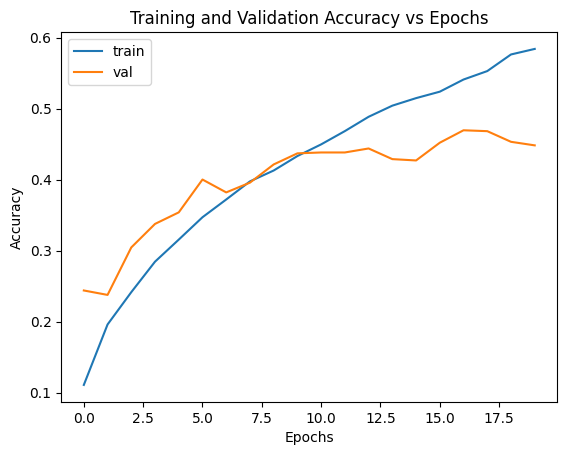

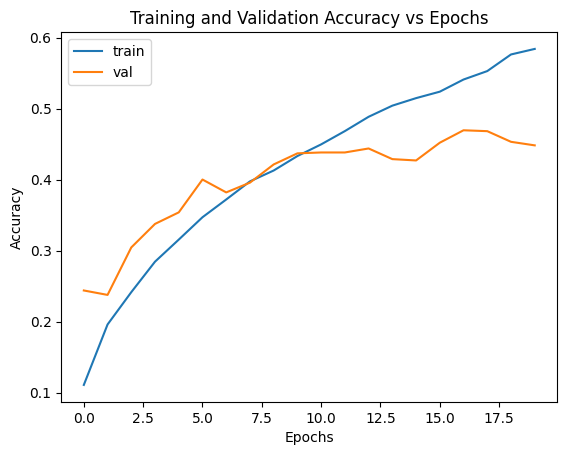

In [23]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy vs Epochs")

plt.legend()
plt.show()

In [25]:
model.save('my_model.keras')

##Later you can load the model using:

from tensorflow.keras.models import load_model
model = load_model("my_model.keras")
